Synchronization in Chaotic Systems
======
-----
Based on the work of Louis Pecora and Thomas Carroll in 1989, and Kevin Cumo and Alan Oppenhiem in 1993

$\:$

**What does it mean?**

- Systems that follow each other

**Why does it happen?**

- Math! 

**Who cares?**

- It's cool! Some applications, a simple crypt is implemented here

$\:$

$\:$

Quick Review of Chaotic Systems
======
______

$\:$

**Examples will be worked through the familiar (and awesome) Lorenz Equation.**

$\:$


\begin{equation}
\dot{x} = s(y-x)
\end{equation}
\begin{equation}
\dot{y} = rx - y - xz
\end{equation}
\begin{equation}
\dot{z} = xy - bz
\end{equation}


$\:$



Import necessary python toolkits  

In [17]:
import numpy as np
import math
import IPython
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.io.wavfile import read, write
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$\:$

**Define our parameters and initial conditions**

In [2]:
s = 10
r = 28
b = 8.0/3

tf = 100.0
numSteps = 100000
dt = tf/numSteps

t = np.linspace(0,tf,numSteps)

x = np.zeros(numSteps)
y = np.zeros(numSteps)
z = np.zeros(numSteps)

x[0] = 0
y[0] = 1
z[0] = 0

$\:$

**Solve the system (numerically)**

In [3]:
for i in range(numSteps-1):
    x[i+1] = x[i] + (s * (y[i]-x[i]))*dt
    y[i+1] = y[i] + (r*x[i] - y[i] - x[i]*z[i])*dt
    z[i+1] = z[i] + (x[i]*y[i]- b*z[i])*dt

$\:$

**Plot phase space**

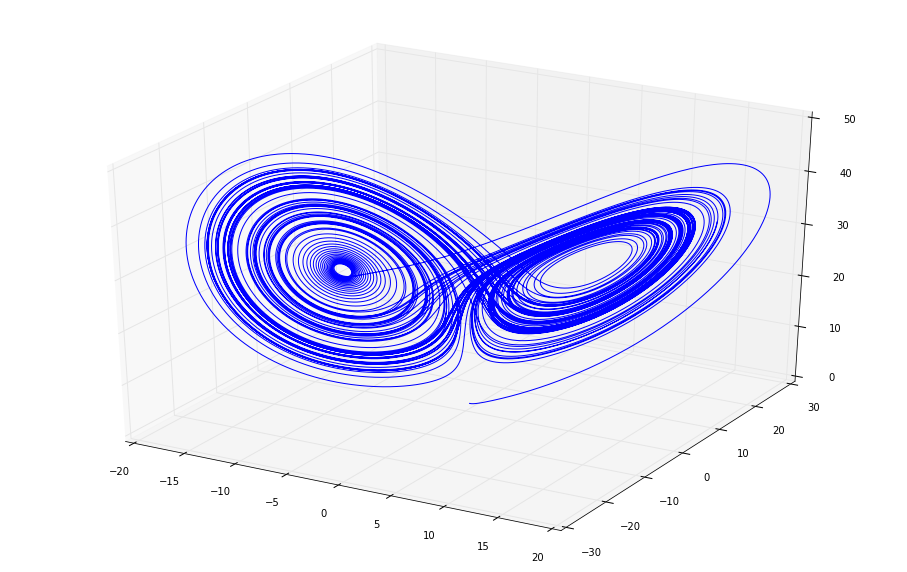

In [4]:
fig = figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot(x, y, z)

$\:$

**Now lets see what happens when we change the initial condition very slightly.**

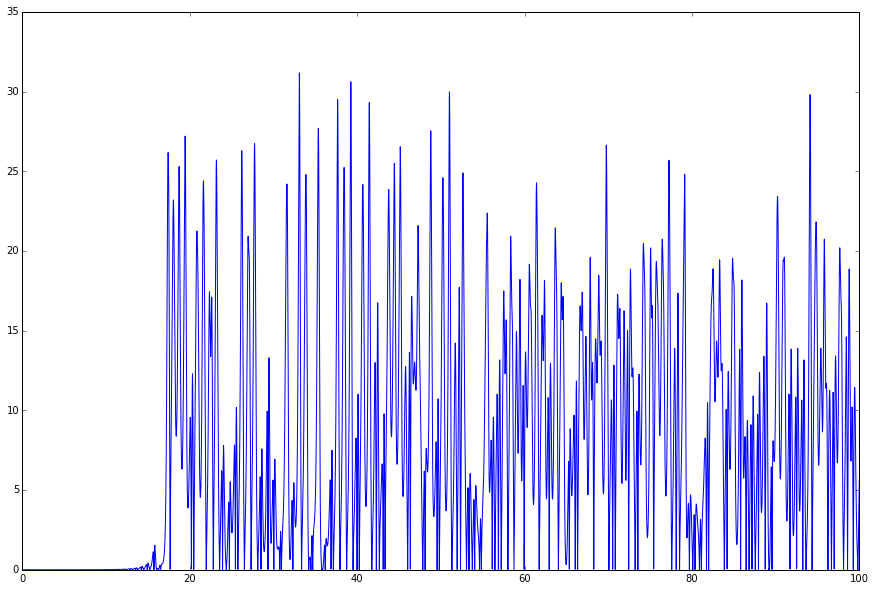

In [5]:
x_s = np.zeros(numSteps)
y_s = np.zeros(numSteps)
z_s = np.zeros(numSteps)

x_s[0] = 0
y_s[0] = 1
z_s[0] = 0.01

for i in range(numSteps-1):
    x_s[i+1] = x_s[i] + (s * (y_s[i]-x_s[i]))*dt
    y_s[i+1] = y_s[i] + (r*x_s[i] - y_s[i] - x_s[i]*z_s[i])*dt
    z_s[i+1] = z_s[i] + (x_s[i]*y_s[i] - b*z_s[i])*dt
    
fig, ax = plt.subplots();
fig.set_size_inches(15,10);
ax.plot(t,abs(x-x_s))

$\:$ 

Lyapunov Exponents
=========
------
$\:$




\begin{equation}
|\delta \mathbf{Z}| \approx e^{\lambda t}|\delta \mathbf{Z_o}|
\end{equation}

** It's intutitive!**

$\:$ 

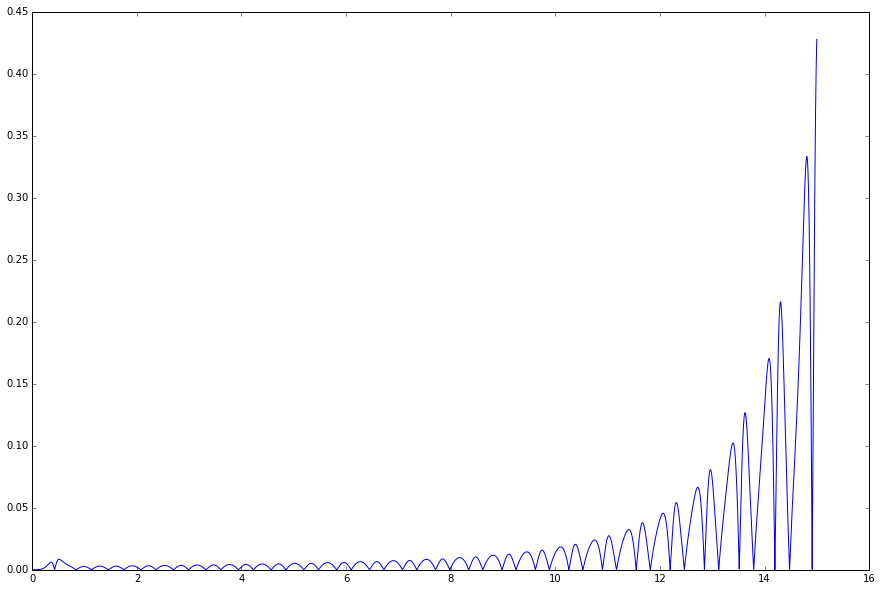

In [6]:
fig, ax = plt.subplots();
fig.set_size_inches(15,10);
ax.plot(t[0:15000],abs(x-x_s)[0:15000])

**No surprise here! The lorenz system has positive Lyapunov exponents**

$\:$

Synchronization
=======
-----


$\:$

**From what we know about choas, chaotic systems should never synchronize right?!**

$\:$


**Subsystems will synchronize only if the subsystem Lyapunov exponents are all negative**

$\:$


**What does that mean?**


$\:$


**Subsystems**
=======
-------------------

$\:$

\begin{equation}
\dot{u} = f(u)
\end{equation}

Divide the system up totally arbitrarily. Let

\begin{equation}
v = [u_1, ..., u_m]^T
\end{equation}
\begin{equation}
w = [u_{m+1},...,u_n]^T
\end{equation}

Then 

\begin{equation}
g = [f_1(u),...,f_m(u)]^T
\end{equation}
\begin{equation}
h = [f_{m+1}(u),...,f_n(u)]^T
\end{equation}

It's clear that

\begin{equation}
\dot{v} = g(v,w)
\end{equation}
\begin{equation}
\dot{w} = h(v,w)
\end{equation}

**Great! We now know what subsystems are**


$\:$

$\:$

Output to input subsystems
=====================
-------------------------

$\:$
Create a new subsystem $w'$ but use the solution $v$

\begin{equation}
\dot{v} = g(v,w)
\end{equation}
\begin{equation}
\dot{w} = h(v,w)
\end{equation}
\begin{equation}
\dot{w}' = h(v,w')
\end{equation}

Now lets look at the error of $w'$ and $w$

Obviously synchronization will occur only if 
\begin{equation}
w'-w \rightarrow 0 \quad as \quad t\rightarrow \infty 
\end{equation}


$\:$


$\:$

Back to Lorenz!
===============
------------ 


\begin{equation}
\dot{x} = s(y-x)
\end{equation}
\begin{equation}
\dot{y} = rx - y - xz
\end{equation}
\begin{equation}
\dot{z} = xy - bz
\end{equation}

Consider these subsystems

\begin{equation}
\dot{x}_1 = s(y-x_1)
\end{equation}
\begin{equation}
\dot{z}_1 = x_1y - bz_1
\end{equation}

$\:$

\begin{equation}
\dot{y}_2 = rx - y_2 - xz_2
\end{equation}
\begin{equation}
\dot{z}_2 = xy_2 - bz_2
\end{equation}

**Proof error goes to 0 for subsystem 1**

\begin{equation}
J = \left[ \begin{array}{ccc}
-s && 0\\
y && -b \end{array} \right]
\end{equation}

The characteristic polynomail is
\begin{equation}
(s+\lambda)(b+\lambda) = 0
\end{equation}

The roots are
\begin{equation}
\lambda_1 = -b
\end{equation}
\begin{equation}
\lambda_2 = -s
\end{equation}

It is more complicated to show subsystem 2 has negative Laypunov exponents, numerical techniques are needed.

$\:$


**IDEA:** Let $x(t)$ drive subsystem 2, then let $y_2$ drive subsystem 1!

\begin{equation}
\dot{x}_s = s(y_s - x_s)
\end{equation}
\begin{equation}
\dot{y}_s = rx - y_s - xz_s
\end{equation}
\begin{equation}
\dot{z}_s = xy_s - bz_s
\end{equation}

This should work, but let's check out the error dynamics

\begin{equation}
e = [x \ \ y \ \ z]^T - [x_s \ \ y_s \ \ z_s]^T
\end{equation}

\begin{equation}
\dot{e}_1 = s(e_2 - e_1)
\end{equation}
\begin{equation}
\dot{e}_2 = -e_2 - xe_3
\end{equation}
\begin{equation}
\dot{e}_3 = xe_2 - be_3
\end{equation}

Lyapunov function!

\begin{equation}
V = \frac{1}{2} (\frac{1}{s}e_1^2 + e_2^2 + 4e_3^2)
\end{equation}
\begin{equation}
\dot{V} = \frac{1}{s} e_1 \dot{e}_1 + e_2 \dot{e}_2 + 4 e_3\dot{e}_3
\end{equation}
\begin{equation}
\dot{V} = -(e_1 -\frac{1}{2}e_2)^2 - \frac{3}{4}e_2^2 - 4be_3^2
\end{equation}

Negative definite -> Proof of synchronization!

$\:$

$\:$

$\:$

**Simulation Time!** 

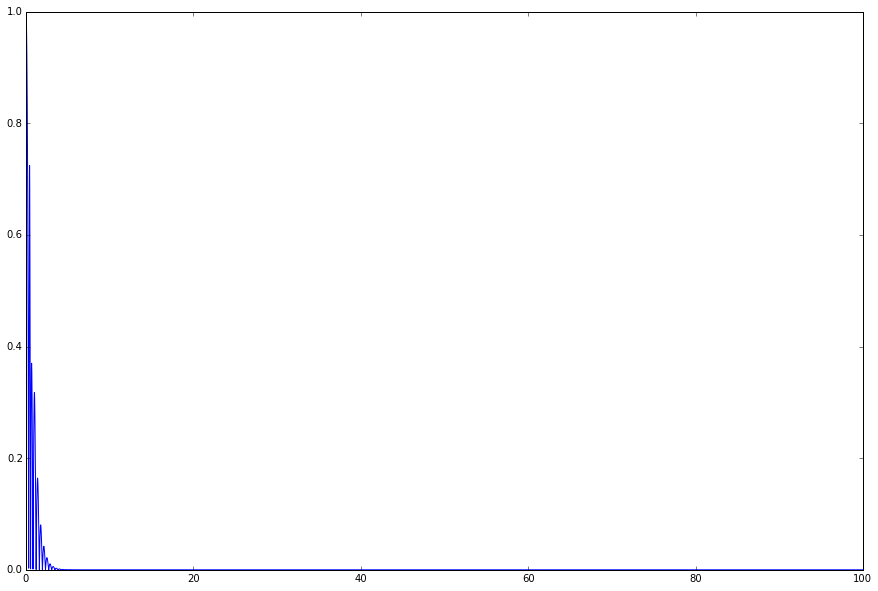

In [7]:
x_s[0] = 1.
y_s[0] = 2.
z_s[0] = 3.
for i in range(numSteps-1):
    x_s[i+1] = x_s[i] + (s * (y_s[i]-x_s[i]))*dt
    y_s[i+1] = y_s[i] + (r*x[i] - y_s[i] - x[i]*z_s[i])*dt
    z_s[i+1] = z_s[i] + (x[i]*y_s[i] - b*z_s[i])*dt

fig, ax = plt.subplots();
fig.set_size_inches(15,10);
ax.plot(t,abs(x-x_s))

**Wow that worked better than expected didn't it!**

$\:$

$\:$

Application - Sending Your Fav Embarrasing Song To Your Bff
======
------

**Plan of Attack**
- Read in song
- Tell your friend beforehand $s,r,b$
- Add $x(t)$ to the song such that $x(t)$ is much more powerful than the song 
- Send message $m(t) = song + x(t)$ 
- Your friend will read in $m(t)$ to his synchronous system
- Your friend will subtract his $x_s(t)$ from the message $m(t)$
- Your friend will enjoy your favorite song


$\:$

$\:$
**Read in your fav song!**

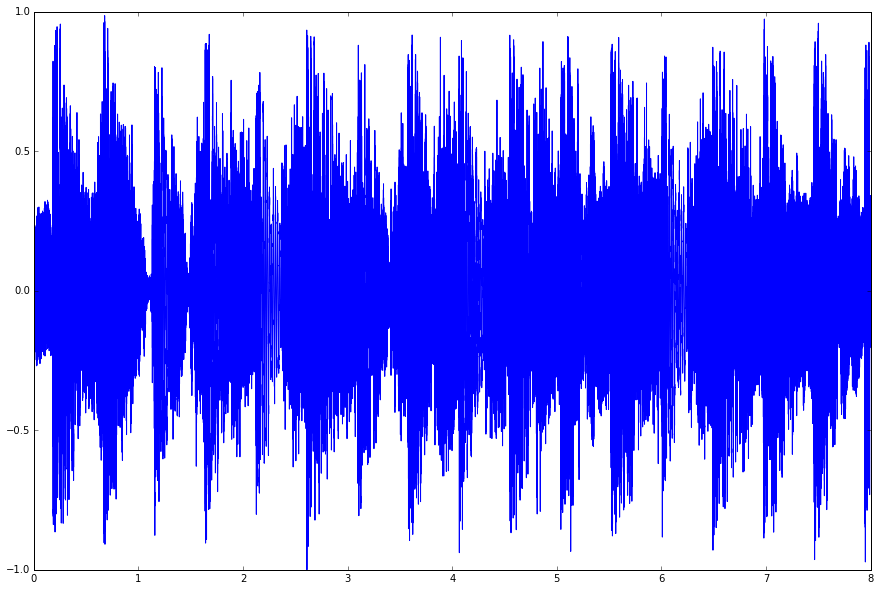

In [21]:
(sample_rate,song) = read("FavSong.wav")

tf = len(song)/sample_rate
numSteps = len(song)
dt = tf/numSteps

t = np.linspace(0,tf,numSteps)

fig, ax = plt.subplots();
fig.set_size_inches(15,10);
ax.plot(t,song)

IPython.display.Audio("FavSong.wav")

$\:$


**Solve the System Numerically, then add the system to the song**

In [19]:
x = np.zeros(numSteps)
y = np.zeros(numSteps)
z = np.zeros(numSteps)

x[0] = 0
y[0] = 1
z[0] = 0

tf = 200.
dt = tf/numSteps
t = np.linspace(0,tf,numSteps)

for i in range(numSteps-1):
    x[i+1] = x[i] + (s * (y[i]-x[i]))*dt
    y[i+1] = y[i] + (r*x[i] - y[i] - x[i]*z[i])*dt
    z[i+1] = z[i] + (x[i]*y[i] - b*z[i])*dt
    
message = x + .001*song

write("Message.wav",sample_rate,message)
IPython.display.Audio("Message.wav")

$\:$


$\:$
**Set up the synchronous system** 

In [10]:
x_s = np.zeros(numSteps)
y_s = np.zeros(numSteps)
z_s = np.zeros(numSteps)

x_s[0] = 1.
y_s[0] = 2.
z_s[0] = 3.

for i in range(numSteps-1):
    x_s[i+1] = x_s[i] + (s * (y_s[i]-x_s[i]))*dt
    y_s[i+1] = y_s[i] + (r*message[i] - y_s[i] - message[i]*z_s[i])*dt
    z_s[i+1] = z_s[i] + (message[i]*y_s[i] - b*z_s[i])*dt

$\:$


**Decrypt the song and see how we did!**

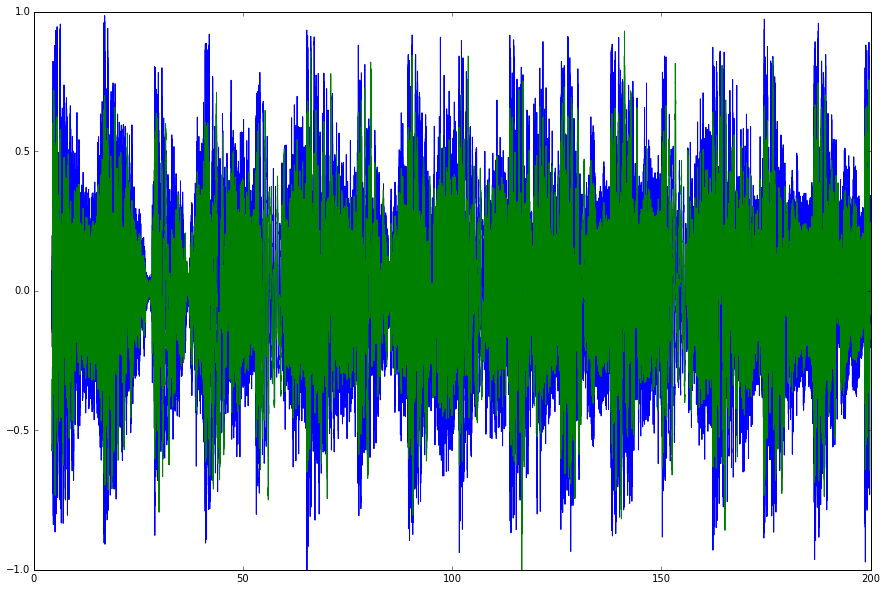

In [11]:
ic_error_length = 8000

decrypt = message - x_s
decrypt = decrypt[ic_error_length:]
decrypt = decrypt/abs(decrypt).max()

fig, ax = plt.subplots();


fig.set_size_inches(15,10);
ax.plot(t[ic_error_length:],song[ic_error_length:],t[ic_error_length:],decrypt)

In [12]:
write("Decrypt.wav",sample_rate,decrypt)
!afplay Decrypt.wav

'afplay' is not recognized as an internal or external command,
operable program or batch file.


**Woooo it works**




$\:$


$\:$

Sensitivity to the Key - Experimental Approach
======
-----


$\:$

$\:$
**Set up system with parameters changed by 30%**

In [13]:
s2 = s*1.01
r2 = r*1.01
b2 = b*1.01

x_s2 = np.zeros(numSteps)
y_s2 = np.zeros(numSteps)
z_s2 = np.zeros(numSteps)


x_s2[0] = 1.
y_s2[0] = 2.
z_s2[0] = 3.

for i in range(numSteps-1):
    x_s2[i+1] = x_s2[i] + (s2 * (y_s2[i]-x_s2[i]))*dt
    y_s2[i+1] = y_s2[i] + (r2*message[i] - y_s2[i] - message[i]*z_s2[i])*dt
    z_s2[i+1] = z_s2[i] + (message[i]*y_s2[i] - b2*z_s2[i])*dt

$\:$

$\:$

**Decrypt and Compare**

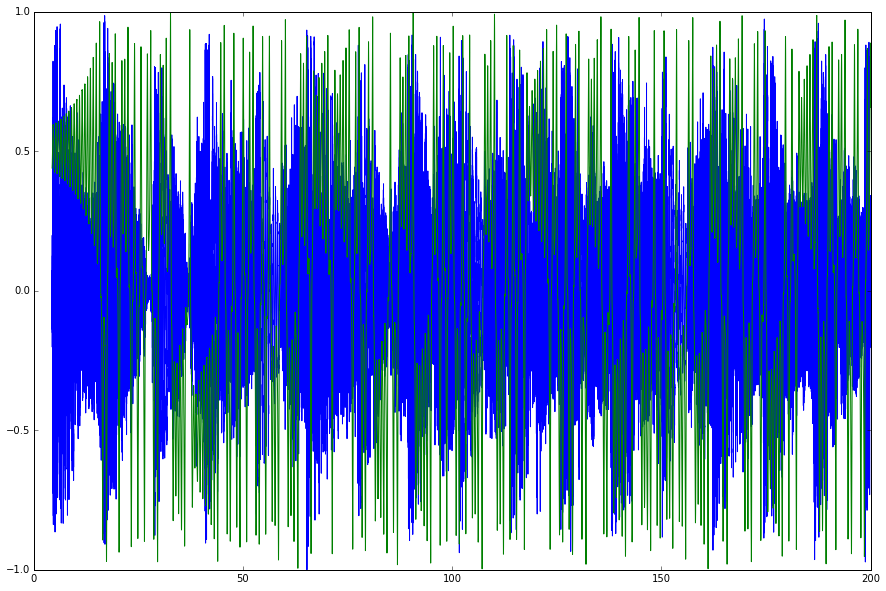

In [14]:
ic_error_length = 8000

decrypt2 = message - x_s2
decrypt2 = decrypt2[ic_error_length:]
decrypt2 = decrypt2/abs(decrypt2).max()

fig, ax = plt.subplots();
fig.set_size_inches(15,10);
ax.plot(t[ic_error_length:],song[ic_error_length:],t[ic_error_length:],decrypt2)

In [15]:
write("Decrypt2.wav",sample_rate,decrypt2)
!afplay Decrypt2.wav

'afplay' is not recognized as an internal or external command,
operable program or batch file.


**No synchronization occurs, the embarrasing (and fantastic) song is safe!**